#  generate data rho dengan noise

## import library

In [27]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

## load data

In [28]:
rho_mentah = np.loadtxt('rho_dua_dimensi_cartesian_data_tanpa_mp.csv', delimiter=',')

## pre-process data

In [29]:
rho_siap = rho_mentah.reshape(len(rho_mentah),20,20)
rho_siap.shape

(130321, 20, 20)

## membuat gaussian noise

In [30]:
for i in range(len(rho_siap)):
    noise_std_dev = np.array([0.1, 0.3, 0.5])
    index_noise = random.randint(0,2)
    noise_matrix = np.random.normal(0, noise_std_dev[index_noise], (20,20))
    rho_siap[i] = rho_siap[i] + noise_matrix


In [31]:
rho_siap = rho_siap.reshape(len(rho_siap), 400)
rho_siap.shape

(130321, 400)

In [32]:
np.savetxt('rho_dua_dimensi_cartesian_noise.csv', rho_siap, fmt='%.11f', delimiter=',')
data_rho_noise_siap = np.loadtxt('rho_dua_dimensi_cartesian_noise.csv', delimiter=',').reshape(len(rho_siap),20,20)
data_rho_noise_siap.shape

(130321, 20, 20)

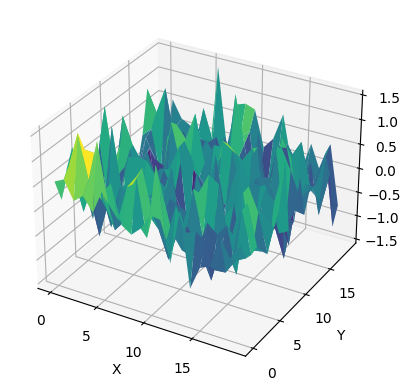

In [33]:
#plotting

plot_x = np.linspace(0,19,20)
plot_y = np.linspace(0,19,20)
plot_x, plot_y = np.meshgrid(plot_x, plot_y)

#index = random.randint(0,len(rho_mentah))
#print(index)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(plot_x, plot_y, data_rho_noise_siap[6], cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## perhitungan gauss seidel

In [34]:
data_rho_noise_siap.shape

(130321, 20, 20)

In [35]:
data_rho_noise_latih = data_rho_noise_siap[:100]
data_rho_noise_latih.shape

(100, 20, 20)

In [36]:
#syarat awal
jumlah_x = 20
jumlah_y = 20
jumlah_titik = jumlah_x*jumlah_y
jumlah_data = 100

#syarat awal rho
jumlah_titik_x = np.arange(0, jumlah_x)
jumlah_titik_y = np.arange(0, jumlah_y)


#syarat awal phi
delta_x = 0.5
delta_y = 0.5
jumlah_iterasi = 100
epsilon_nol = 1

iterasi = np.arange(0,jumlah_iterasi)
temp = np.zeros((jumlah_y,jumlah_x))
phi = np.zeros((jumlah_y,jumlah_x))
data_phi = np.zeros((jumlah_data, jumlah_x, jumlah_y))

In [37]:
def phi_hitung(g):    
    for h in (iterasi):
        #print(' h=',h)
        for j in range (1, jumlah_y-1):
            #print('   j=',j)
            for i in range (1, jumlah_x-1):
                    #print('     i=',i)
                    phi[j,i] = ((((temp[j, i+1]+temp[j, i-1])/delta_x**2)+((temp[j+1, i]+temp[j-1, i])/delta_y**2)+\
                                (data_rho_noise_latih[g,j,i]/epsilon_nol))/2)*(delta_x**2 * delta_y**2)/(delta_y**2 + delta_x**2)
                    #print('rho=', data_training[g,j,i], 'phi=', phi[j,i])
                    temp[j,i] = phi[j,i]
    return phi

In [38]:
for g in range(len(data_rho_noise_latih)):
    phi_hitung(g)
    data_phi[g,:,:]=phi

In [39]:
data_phi.shape

(100, 20, 20)

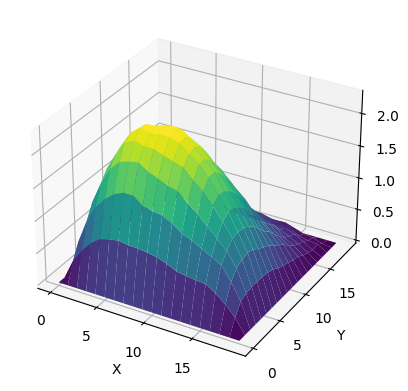

In [44]:
#plotting

#index = random.randint(0,len(data_phi))
#print(index)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(plot_x, plot_y, data_phi[89], cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [41]:
data_phi

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  5.40037650e-02,  5.61472608e-02, ...,
         -3.49280029e-02, -2.46037845e-02,  0.00000000e+00],
        [ 0.00000000e+00,  4.56216926e-02, -2.30981408e-02, ...,
         -1.05969639e-01, -7.10741447e-02,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  6.34043082e-03, -7.03252980e-02, ...,
         -8.16740982e-02, -9.23844202e-02,  0.00000000e+00],
        [ 0.00000000e+00, -1.26347845e-02,  7.34474768e-04, ...,
          2.17277289e-02, -4.96334807e-02,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.13912899e-01,  8.14733086e-02, ...,
          1.09298760e-02, -2.91908732e

In [42]:
data_phi_fix=data_phi.reshape(data_rho_noise_latih.shape[0], data_rho_noise_latih.shape[1]*data_rho_noise_latih.shape[2])
data_phi_fix.shape

(100, 400)

In [43]:
np.savetxt('phi_dua_dimensi_cartesian_noise.csv', data_phi_fix, fmt = '%.15f', delimiter=',') #penyimpanan hasil phi